### Data Analysis

In [29]:
import pandas as pd
import time
import datetime
from sklearn.preprocessing import StandardScaler
import numpy as np

In [30]:
import yfinance as yf

df2 = yf.download('BTC-USD', start='2023-04-01', end='2023-05-05',interval="1d")
df1 = yf.download('^GSPC', start='2023-04-01', end='2023-05-05',interval="1d")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-01,28473.332031,28802.457031,28297.171875,28411.035156,28411.035156,10876469901
2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
2023-04-05,28169.726562,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
2023-04-06,28175.226562,28178.384766,27738.759766,28044.140625,28044.140625,13837809380
2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497
2023-04-08,27920.513672,28159.863281,27883.386719,27947.794922,27947.794922,9373255556
2023-04-09,27952.367188,28532.830078,27828.480469,28333.050781,28333.050781,12175322951


In [32]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-01,28473.332031,28802.457031,28297.171875,28411.035156,28411.035156,10876469901
2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
2023-04-05,28169.726562,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
2023-04-06,28175.226562,28178.384766,27738.759766,28044.140625,28044.140625,13837809380
2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497
2023-04-08,27920.513672,28159.863281,27883.386719,27947.794922,27947.794922,9373255556
2023-04-09,27952.367188,28532.830078,27828.480469,28333.050781,28333.050781,12175322951


In [33]:
# Assuming df1 and df2 are your dataframes

# Normalize the 'High' column in df1
df1['High'] = (df1['High'] - df1['High'].min()) / (df1['High'].max() - df1['High'].min())

# Normalize the 'High' column in df2
df2['High'] = (df2['High'] - df2['High'].min()) / (df2['High'].max() - df2['High'].min())

# Make sure both dataframes have the same date range
merged_df = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

# Calculate the correlation
correlation = merged_df['High_x'].corr(merged_df['High_y'])

print(f"The correlation between the 'High' columns is: {correlation}")

The correlation between the 'High' columns is: 0.25267164272397913


### Machine Learning 

In [45]:
df = yf.download('BTC-USD', start='2021-04-01', end='2023-05-05',interval="1d")


[*********************100%***********************]  1 of 1 completed


In [46]:
df = df.reset_index()

In [47]:
train_dates = pd.to_datetime(df["Date"])

In [48]:
train_dates

0     2021-04-01
1     2021-04-02
2     2021-04-03
3     2021-04-04
4     2021-04-05
         ...    
759   2023-04-30
760   2023-05-01
761   2023-05-02
762   2023-05-03
763   2023-05-04
Name: Date, Length: 764, dtype: datetime64[ns]

In [51]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,58926.562500,59586.070312,58505.277344,59095.808594,59095.808594,61669163792
1,2021-04-02,59098.878906,60267.187500,58869.281250,59384.312500,59384.312500,58727860620
2,2021-04-03,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484
3,2021-04-04,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970
4,2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115
...,...,...,...,...,...,...,...
759,2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641,29268.806641,14652199272
760,2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
761,2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
762,2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518


In [49]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,764.000000,764.000000,764.000000,764.000000,764.000000,7.640000e+02
mean,34817.786925,35606.139288,33905.661578,34773.294861,34773.294861,3.264979e+10
std,13756.791382,14102.200199,13329.861954,13722.644545,13722.644545,1.476675e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,21757.631348,22287.079590,21241.841309,21759.721191,21759.721191,2.355519e+10
50%,33703.154297,34624.142578,32290.150391,33652.289062,33652.289062,3.041945e+10
75%,44910.738281,46603.070312,43620.061523,44886.707031,44886.707031,3.787965e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.263581e+11


In [52]:
cols = list(df)[1:6]

In [53]:
df_for_training = df[cols].astype(float)

In [54]:
df_for_training.reset_index(drop=True,inplace=True)
df_for_training

,Open,High,Low,Close,Adj Close
0,58926.562500,59586.070312,58505.277344,59095.808594,59095.808594
1,59098.878906,60267.187500,58869.281250,59384.312500,59384.312500
2,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625
3,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688
4,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906
...,...,...,...,...,...
759,29245.515625,29952.029297,29114.021484,29268.806641,29268.806641
760,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359
761,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109
762,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594


<Axes: >

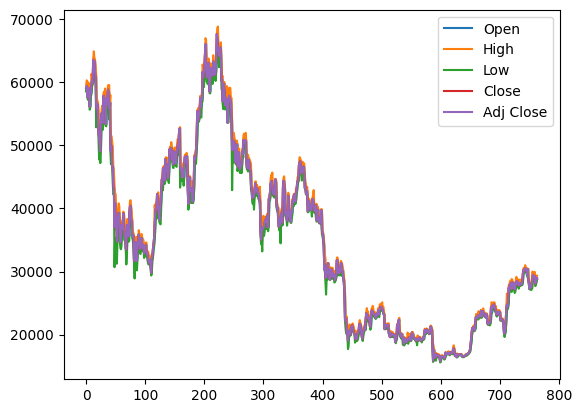

In [55]:
#Plot price for BTC
df_for_training.plot()

In [56]:
#Rescaling data 
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [57]:
df_for_training_scaled

array([[ 1.75364796,  1.70155293,  1.8466606 ,  1.77359744,  1.77359744],
       [ 1.76618208,  1.74988322,  1.87398589,  1.79463514,  1.79463514],
       [ 1.78789694,  1.73874873,  1.77899469,  1.6648068 ,  1.6648068 ],
       ...,
       [-0.48957785, -0.47717702, -0.44902618, -0.44428383, -0.44428383],
       [-0.44642047, -0.4503385 , -0.4299388 , -0.42052858, -0.42052858],
       [-0.42090287, -0.44369318, -0.3912296 , -0.43209352, -0.43209352]])

In [58]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [59]:
trainX,trainY = np.array(trainX),np.array(trainY)

In [60]:
print("trainX shape: ",trainX.shape)
print("trainY shape: ",trainY.shape)

trainX shape:  (750, 14, 5)
trainY shape:  (750, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
43/43 [==============================] - 4s 23ms/step - loss: 0.3217 - val_loss: 0.0144
Epoch 2/10
43/43 [==============================] - 0s 10ms/step - loss: 0.0876 - v

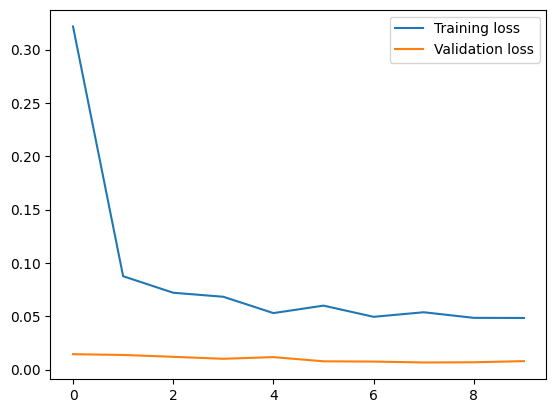

In [62]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [73]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 91
n_days_for_prediction=90  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


[Timestamp('2023-02-03 00:00:00', freq='C'), Timestamp('2023-02-06 00:00:00', freq='C'), Timestamp('2023-02-07 00:00:00', freq='C'), Timestamp('2023-02-08 00:00:00', freq='C'), Timestamp('2023-02-09 00:00:00', freq='C'), Timestamp('2023-02-10 00:00:00', freq='C'), Timestamp('2023-02-13 00:00:00', freq='C'), Timestamp('2023-02-14 00:00:00', freq='C'), Timestamp('2023-02-15 00:00:00', freq='C'), Timestamp('2023-02-16 00:00:00', freq='C'), Timestamp('2023-02-17 00:00:00', freq='C'), Timestamp('2023-02-21 00:00:00', freq='C'), Timestamp('2023-02-22 00:00:00', freq='C'), Timestamp('2023-02-23 00:00:00', freq='C'), Timestamp('2023-02-24 00:00:00', freq='C'), Timestamp('2023-02-27 00:00:00', freq='C'), Timestamp('2023-02-28 00:00:00', freq='C'), Timestamp('2023-03-01 00:00:00', freq='C'), Timestamp('2023-03-02 00:00:00', freq='C'), Timestamp('2023-03-03 00:00:00', freq='C'), Timestamp('2023-03-06 00:00:00', freq='C'), Timestamp('2023-03-07 00:00:00', freq='C'), Timestamp('2023-03-08 00:00:00'

/var/folders/zp/cjw04txs0mj1w957b3c1rzsw0000gn/T/ipykernel_10559/233887501.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


<Axes: xlabel='Date', ylabel='Open'>

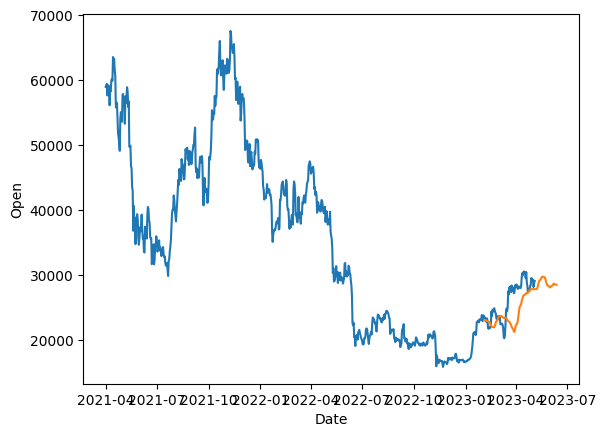

In [74]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(x=original['Date'], y=original['Open'])
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Open'])